## Fortgeschrittene KI

In diesem Abschnitt werden die Daten der fortgeschrittenen KI/EA visualisiert.
Diese besitzt nun drei verschiedene Gene welche je nach Situation aktiviert werden.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df_EA = pd.read_csv('Data/EA2.csv', index_col=[0], sep=';')
#df_EA = pd.read_csv('Data/EA2_punkteBasiert.csv', index_col=[0], sep=';')

evolutions = df_EA.groupby(df_EA.index).size().iloc[:1].values # get the number of evolutions
KINumber = df_EA.groupby(df_EA.index).size().size # get the number of different KIs (individuals)
df_EA['Evolution'] = np.arange(evolutions).repeat(KINumber) # add new evolution column
df_EA = df_EA.reset_index().set_index(['Evolution', 'Name']) #make multiindex

### Calulate more Data for analysis
df_Mean = df_EA.groupby(level=0).agg(['mean']).stack(1) # calc mean for every evolution
df_Mean = df_Mean.reset_index().set_index(['Evolution']) #remove multiindex
df_Mean.drop(['Winner', "level_1"], axis=1, inplace=True) # remove useless columns
### Calculates the win percentage of each evolution.
df_wincounter = df_EA.groupby(level=0)['Winner'].value_counts().unstack(fill_value=0).stack().to_frame()
df_cleaned = df_wincounter.rename(columns={0: "WinPercent"}).reset_index().set_index(['Evolution'])
df_winner = df_cleaned.loc[df_cleaned['Winner'] == True]
df_winner.drop(['Winner'], axis=1) # remove useless columns
df_Mean['WinPercent'] = df_winner['WinPercent'].apply(lambda x: x / KINumber * 100) # calculate winpercentage
### Calculate standard deviation
df_standardDeviation = df_EA.std(axis = 0, skipna = True, level = 0)
df_standardDeviation.drop(['Winner', "Fitness", "Score", "GameTime"], axis=1, inplace=True)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = domi1.iloc[domi1.index.get_level_values('Evolution') == 17]

Coord  Winner  Fitness  GameTime  Score  deffScore  \
Evolution Name                                                                 
11        EA24   <3468, 5, 958>   False       71       624    120        -50   
          EA108  <3468, 5, 958>   False       91       747    140        -50   
          EA182  <3468, 5, 958>   False       61       779    120        -60   
          EA163  <3468, 5, 958>   False       41       574     80        -40   
          EA156  <3468, 5, 958>   False       61       603    120        -60   
          EA72   <3468, 5, 958>   False       71       616    120        -50   
          EA88   <3468, 5, 958>   False       61       789    120        -60   
          EA4    <3468, 5, 958>   False       61       538    100        -40   
          EA179  <3468, 5, 958>   False      101       636    140        -40   
          EA170  <3468, 5, 958>   False       81       771    140        -60   
          EA150  <3468, 5, 958>   False      101       724    140        -40   
          EA71   <3468, 5, 958>   False       81       741    140        -60   
          EA111  <3468, 5, 958>   False       71       787    140        -70   
          EA100  <3468, 5, 958>   False       91       618    140        -50   
          EA166  <3468, 5, 958>   False       41       662     80        -40   
          EA15   <3468, 5, 958>   False       91       709    140        -50   
20        EA145  <3468, 5, 958>   False      141       875    240       -100   
          EA167  <3468, 5, 958>   False      121       649    200        -80   
          EA183  <3468, 5, 958>   False      111       600    200        -90   
          EA178  <3468, 5, 958>   False      161       625    240        -80   
          EA76   <3468, 5, 958>   False      131       684    220        -90   
          EA58   <3468, 5, 958>   False      141       591    240       -100   

                 suppScore  townLifeDeviation  dominanceLevel  \
Evolution Name                                                  
11        EA24           1               50.0               5   
          EA108          1               50.0               5   
          EA182          1               50.0               5   
          EA163          1               50.0               5   
          EA156          1               50.0               5   
          EA72           1               50.0               5   
          EA88           1               50.0               5   
          EA4            1               50.0               5   
          EA179          1               50.0               5   
          EA170          1               50.0               5   
          EA150          1               50.0               5   
          EA71           1               50.0               5   
          EA111          1               50.0               5   
          EA100          1               50.0               5   
          EA166          1               50.0               5   
          EA15           1               50.0               5   
20        EA145          1               50.0               5   
          EA167          1               50.0               5   
          EA183          1               50.0               5   
          EA178          1               50.0               5   
          EA76           1               50.0               5   
          EA58           1               50.0               5   

                 deff-ConquerRadius  ...  off-SupportMinCap  \
Evolution Name                       ...                      
11        EA24                 1661  ...                 26   
          EA108                2656  ...                 46   
          EA182                4000  ...                 45   
          EA163                 616  ...                 32   
          EA156                2077  ...                 30   
          EA72                 1147  ...                 30   
          EA88                 1577  ...

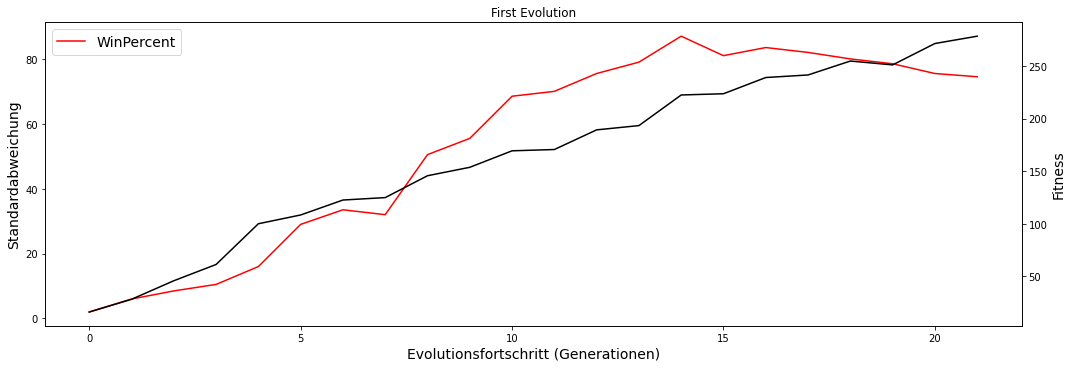

In [7]:
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Evolutionsfortschritt (Generationen)', fontsize=14)
ax1.set_ylabel('Standardabweichung', fontsize=14)

WinPercent, = ax1.plot(df_Mean['WinPercent'].values, color='red', label='WinPercent')
#Fitness, = ax1.plot(df_Mean["deff-ConquerRadius"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["off-ConquerRadius"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(df_Mean["supp-ConquerRadius"].values, color='green', label='Fitness')
#Fitness, = ax1.plot(df_Mean["townLifeDeviation"].values, color='blue', label='Fitness')
#Fitness, = ax1.plot(df_Mean["Score"].values, color='red', label='Fitness')
#Fitness, = ax1.plot(df_Mean["deffScore"].values, color='green', label='Fitness')
#std, = ax1.plot(df_standardDeviation["deff-ConquerRadius"].values, color='blue', label='RadiusExpansionStep')
#std1, = ax1.plot(df_standardDeviation["off-ConquerRadius"].values, color='red', label='MaxConquerRadius')
#std2, = ax1.plot(df_standardDeviation["supp-ConquerRadius"].values, color='green', label='InitialConquerRadius')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color='black'
ax2.set_ylabel('Fitness', color=color, fontsize=14)
#ax2.plot(df_Mean["GameTime"].values, color=color)
ax2.plot(df_Mean["Fitness"].values, color=color)
#ax2.plot(df_EA["Fitness"].values, color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.title('First Evolution')
plt.legend(handles = [WinPercent], fontsize=14)
plt.show()

## 3D Analyse der Pareto-front


<IPython.core.display.Javascript object>


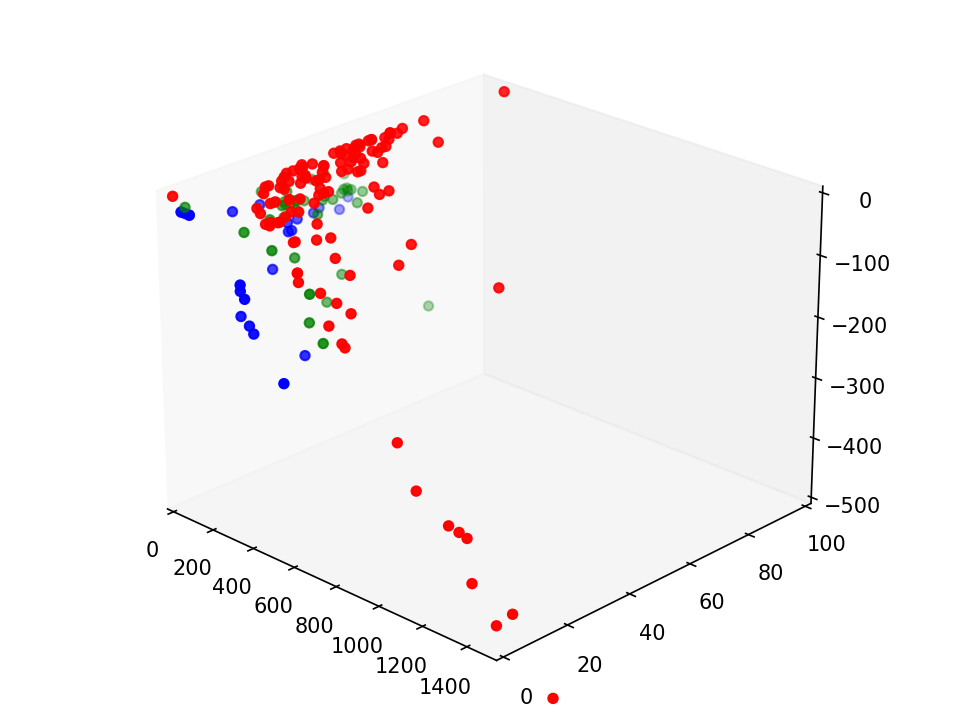

In [18]:
%matplotlib notebook
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import animation
from mpl_toolkits.mplot3d import axes3d as plt3d

fig = plt.figure()
ax = plt3d.Axes3D(fig)

ax.view_init(45, -45)
ax.grid(False)
ax.set_zlim(-100, 0)
plt.xlim(0, 600)
plt.ylim(0, 50)
colors1 = cm.colors.LinearSegmentedColormap.from_list("", ["red","red"])
colors2 = cm.colors.LinearSegmentedColormap.from_list("", ["green","green"])
colors3 = cm.colors.LinearSegmentedColormap.from_list("", ["blue","blue"])
#fig.colorbar(points, shrink=0.5, aspect=5)

domi1 = df_EA[df_EA['dominanceLevel'] == 1]
domi2 = df_EA[df_EA['dominanceLevel'] == 2]
domi3 = df_EA[df_EA['dominanceLevel'] == 3]
domi = domi2.iloc[domi2.index.get_level_values('Evolution') == 2]

# Data for three-dimensional scattered points
zdata = domi["deffScore"].tail(200).values
xdata = domi["Score"].tail(200).values
ydata = domi["suppScore"].tail(200).values

#points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors, vmin=-85, vmax=-10);
points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
#ax.plot_trisurf(xdata, ydata, zdata, cmap='viridis', edgecolor='none');
ax.set_title('Score');
ax.set_xlabel('Attack')
ax.set_ylabel('Support')
ax.set_zlabel('Defensive');


def animate_scatters(iteration, points,zdata,ydata,xdata):
    domiA = domi1.iloc[domi1.index.get_level_values('Evolution') == 20]
    domiB = domi2.iloc[domi2.index.get_level_values('Evolution') == 20]
    domiC = domi3.iloc[domi3.index.get_level_values('Evolution') == 20]
    
    ax.clear()
    ax.set_title(iteration);
    ax.grid(False)
    ax.set_zlim(-500, 0)
    plt.xlim(0, 1500)
    plt.ylim(0, 100)
    
    # Data for three-dimensional scattered points
    zdata = domiA["deffScore"].values
    xdata = domiA["Score"].values
    ydata = domiA["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors1)
    zdata = domiB["deffScore"].values
    xdata = domiB["Score"].values
    ydata = domiB["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors2)
    zdata = domiC["deffScore"].values
    xdata = domiC["Score"].values
    ydata = domiC["suppScore"].values
    points = ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap=colors3)
    
    return points

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate_scatters, fargs=(points,zdata,ydata,xdata), interval=1000, blit=False)
plt.show()